In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
import sympy as sym

In [20]:
class Element:
    
    def __init__(self,xb,yb):
        
        # cambiar las últimas dos fila para cambiar los nodos diagonales
        
        self.M = np.array([[1,xb[0],yb[0],xb[0]*yb[0]],
                  [1,xb[0],yb[1],xb[0]*yb[1]],  
                  [1,xb[1],yb[1],xb[1]*yb[1]],
                  [1,xb[1],yb[0],xb[1]*yb[0]]
                  ])
        
        self.M = np.linalg.inv(self.M)
        self.M = self.M.T
        
        self.xb = xb
        self.yb = yb
        
        self.x = sym.Symbol('x', type='Real')
        self.y = sym.Symbol('y', type='Real')
        
        self.dim = 4 
        
        self.LocalM = np.zeros((self.dim,self.dim))
        
    def N(self,x,y,i):
        
        f = np.dot( self.M, np.array([1,x,y,x*y], dtype=object ))
        
        return f[i]
    
    def Gradient(self):
        
        S = np.dot( self.M, np.array([1,self.x,self.y,self.x*self.y]))
        #print(S)
        
        self.Grad = []
        
        for i in range(self.dim):
            self.Grad.append( [ sym.diff(S[i],self.x),sym.diff(S[i],self.y) ] )
            
        #print(self.Grad)
        
    def GetLocalM(self):
        
        self.Gradient()
        
        for i in range(self.dim):
            for j in range(self.dim):
                GShape = self.Grad[i][0]*self.Grad[j][0] + self.Grad[i][1]*self.Grad[j][1]
                I = sym.integrate( GShape, (self.x, self.xb[0],self.xb[1]), (self.y, self.yb[0],self.yb[1]) )
                self.LocalM[i,j] = I
                
        return self.LocalM
    
    def GetFunction(self, x, y, T):
        
        f = 0.
        
        for i in range(self.dim):
            f += T[i]*self.N(x,y,i)
            
        return f

In [21]:
NElements = 2
domx = np.zeros((NElements,2))
domy = np.zeros((NElements,2))

domx[0] = [0.,1.]
domy[0] = [0.,1.]

domx[1] = [1.,2.]
domy[1] = [0.,1.]

Elements = []

for i in range(NElements):
    e = Element( domx[i], domy[i] )
    Elements.append(e)

In [24]:
for i in range(NElements):
    print(Elements[i].GetLocalM())

[[ 0.66666667 -0.16666667 -0.33333333 -0.16666667]
 [-0.16666667  0.66666667 -0.16666667 -0.33333333]
 [-0.33333333 -0.16666667  0.66666667 -0.16666667]
 [-0.16666667 -0.33333333 -0.16666667  0.66666667]]
[[ 0.66666667 -0.16666667 -0.33333333 -0.16666667]
 [-0.16666667  0.66666667 -0.16666667 -0.33333333]
 [-0.33333333 -0.16666667  0.66666667 -0.16666667]
 [-0.16666667 -0.33333333 -0.16666667  0.66666667]]


In [25]:
Elements[0].LocalM

array([[ 0.66666667, -0.16666667, -0.33333333, -0.16666667],
       [-0.16666667,  0.66666667, -0.16666667, -0.33333333],
       [-0.33333333, -0.16666667,  0.66666667, -0.16666667],
       [-0.16666667, -0.33333333, -0.16666667,  0.66666667]])

In [27]:
TBoundary0 = np.array([4,1,5,2])
TBoundary1 = np.array([0,3,6,2])

In [28]:
Boundaries = []
Boundaries.append(TBoundary0)
Boundaries.append(TBoundary1)

<IPython.core.display.Javascript object>


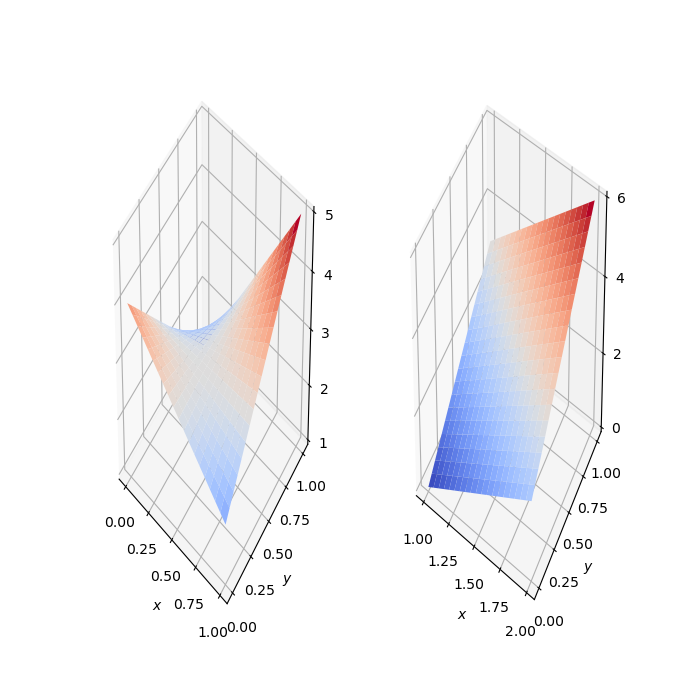

Text(0.5, 0, '$y$')

In [29]:
N = 20
x1 = np.linspace(0.,1.,N)
y1 = np.linspace(0.,1.,N)
X1,Y1 = np.meshgrid(x1,y1)

T1 = Elements[0].GetFunction(X1,Y1,Boundaries[0])

x2 = np.linspace(1.,2.,N)
y2 = np.linspace(0.,1.,N)
X2,Y2 = np.meshgrid(x2,y2)

T2 = Elements[1].GetFunction(X2,Y2,Boundaries[1])


fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1,2,1, projection = '3d',elev = 40, azim = -40)
ax1 = fig.add_subplot(1,2,2, projection = '3d',elev = 40, azim = -40)

ax.plot_surface(X1, Y1, T1, cmap=cm.coolwarm) 
ax.set_xlabel('$x$', fontsize=10)
ax.set_ylabel('$y$', fontsize=10)

ax1.plot_surface(X2, Y2, T2, cmap=cm.coolwarm) 
ax1.set_xlabel('$x$', fontsize=10)
ax1.set_ylabel('$y$', fontsize=10)

# Vamos a globalizar los elementos

In [43]:
# Condiciones de frontera en los nodos globales
T = np.array([100.,100.,0.,10.,10.,0.])

In [44]:
def GetGlobalM(LM,R):
    
    tmp = np.dot(LM,R)
    return np.dot(R.T,tmp)

In [45]:
# Mirar dibujitos de cada diagrama
LM0 = Elements[0].GetLocalM()
R0 = np.array([[1,0,0,0,0,0],
               [0,1,0,0,0,0],
               [0,0,1,0,0,0],
               [0,0,0,0,0,1]])

GM0 = GetGlobalM(LM0,R0)
print(GM0)

[[ 0.66666667 -0.16666667 -0.33333333  0.          0.         -0.16666667]
 [-0.16666667  0.66666667 -0.16666667  0.          0.         -0.33333333]
 [-0.33333333 -0.16666667  0.66666667  0.          0.         -0.16666667]
 [ 0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.        ]
 [-0.16666667 -0.33333333 -0.16666667  0.          0.          0.66666667]]


In [46]:
LM1 = Elements[1].GetLocalM()
R1 = np.array([[0,0,0,0,0,1],
               [0,0,1,0,0,0],
               [0,0,0,1,0,0],
               [0,0,0,0,1,0]])
GM1 = GetGlobalM(LM1,R1)
print(GM1)

[[ 0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.66666667 -0.16666667 -0.33333333 -0.16666667]
 [ 0.          0.         -0.16666667  0.66666667 -0.16666667 -0.33333333]
 [ 0.          0.         -0.33333333 -0.16666667  0.66666667 -0.16666667]
 [ 0.          0.         -0.16666667 -0.33333333 -0.16666667  0.66666667]]


In [47]:
GM = GM0+GM1
print(GM)

[[ 0.66666667 -0.16666667 -0.33333333  0.          0.         -0.16666667]
 [-0.16666667  0.66666667 -0.16666667  0.          0.         -0.33333333]
 [-0.33333333 -0.16666667  1.33333333 -0.16666667 -0.33333333 -0.33333333]
 [ 0.          0.         -0.16666667  0.66666667 -0.16666667 -0.33333333]
 [ 0.          0.         -0.33333333 -0.16666667  0.66666667 -0.16666667]
 [-0.16666667 -0.33333333 -0.33333333 -0.33333333 -0.16666667  1.33333333]]


In [48]:
bc = np.dot(GM,T)
print(bc)

[ 50.  50. -55.   5.   5. -55.]


In [49]:
GMr = np.zeros((2,2))
GMr[0,0] = GM[2,2]
GMr[0,1] = GM[2,5]
GMr[1,0] = GM[5,2]
GMr[1,1] = GM[5,5]
bcr = np.zeros(2)
bcr[0] = bc[2]
bcr[1] = bc[5]
print(GMr)
print(bcr)

[[ 1.33333333 -0.33333333]
 [-0.33333333  1.33333333]]
[-55. -55.]


In [50]:
sol = np.linalg.solve(GMr,-bcr)
print(sol)

[55. 55.]


In [51]:
T[2] = sol[0]
T[5] = sol[1]
print(T)

[100. 100.  55.  10.  10.  55.]


In [52]:
x = np.linspace(0,2,3)
y = np.linspace(0,1,2)
X,Y = np.meshgrid(x,y)

Tg = np.zeros((3,2))

Tg[0,0] = T[0]
Tg[0,1] = T[1]
Tg[1,0] = T[5]
Tg[1,1] = T[2]
Tg[2,0] = T[4]
Tg[2,1] = T[3]

<IPython.core.display.Javascript object>


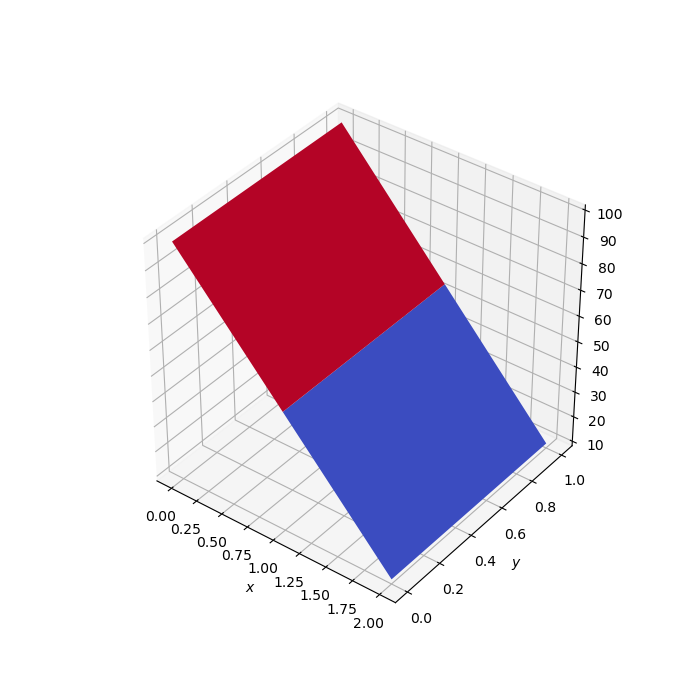

In [53]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1,1,1, projection = '3d',elev = 40, azim = -40)

ax.plot_surface(X, Y, Tg.T, cmap=cm.coolwarm) 
ax.set_xlabel('$x$', fontsize=10)
ax.set_ylabel('$y$', fontsize=10)
plt.savefig('Laplace2D')